## 1. Import Libraries

The first step is to import essential libraries for data manipulation, visualization, and model building:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 2. Set Options

To control the display and behavior of your notebook or script:

In [2]:
# Display all columns of the dataframe
pd.options.display.max_columns = None

# Display all rows of the dataframe
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

## 3. Load the Dataset

In [3]:
df_car = pd.read_csv(r"D:\Machine_Learning_Dataset\Car_Price_Dataset\car_price_dataset.csv")
df_car.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## 4. Data Understanding

##### 4.1 Checking Dimensions of the Data

In [4]:
print(df_car.shape)
print(f"No of samples present in data are: {df_car.shape[0]}")
print(f"No of features present in data are: {df_car.shape[1]}")

(10000, 10)
No of samples present in data are: 10000
No of features present in data are: 10


##### 4.2 Checking the basic information of dataset

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


***Observation***

1. From the above output we can say that there are 10000 rows/records and 10 columns/Features present in our dataset.
2. From above output we can observe that 4 categorical & 6 numerical Attributes.
3. All the features are having correct data-types. So we don't have to do any changes.

##### 4.3 Checking NaN values in our Dataset

In [6]:
df_car.isnull().sum().to_frame().rename(columns={0: 'Total No. of Missing Values'})

,Total No. of Missing Values
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


##### 4.4 Descriptive Statistics Analysis

In [7]:
df_car.describe(include='object')

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


In [8]:
df_car.describe(include=['int64', 'float64']).round(2)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2011.54,3.00,149239.11,3.50,2.99,8852.96
std,6.90,1.15,86322.35,1.11,1.42,3112.60
min,2000.00,1.00,25.00,2.00,1.00,2000.00
25%,2006.00,2.00,74649.25,3.00,2.00,6646.00
50%,2012.00,3.00,149587.00,3.00,3.00,8858.50
75%,2017.00,4.00,223577.50,4.00,4.00,11086.50
max,2023.00,5.00,299947.00,5.00,5.00,18301.00


##### 4.5 Checking Duplicate Values

In [9]:
print(f"Duplicte no of rows in dataset are: {(df_car.duplicated().sum())}")

Duplicte no of rows in dataset are: 0


##### 4.6 Showing Only Categorical Features

In [10]:
df_car.select_dtypes(include='object').head()

,Brand,Model,Fuel_Type,Transmission
0,Kia,Rio,Diesel,Manual
1,Chevrolet,Malibu,Hybrid,Automatic
2,Mercedes,GLA,Diesel,Automatic
3,Audi,Q5,Electric,Manual
4,Volkswagen,Golf,Hybrid,Semi-Automatic


##### 4.7 Showing only Numeric Features

In [11]:
df_car.select_dtypes(include=['int64', 'float64']).head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,2020,4.2,289944,3,5,8501
1,2012,2.0,5356,2,3,12092
2,2020,4.2,231440,4,2,11171
3,2023,2.0,160971,2,1,11780
4,2003,2.6,286618,3,3,2867


## 5. Data Cleaning

##### 5.1 Checking the Unique Car Company Names

In [42]:
df_car['Brand'].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [13]:
df_car['Model'].unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

In [14]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.6.1


## 6. Exploratory Data Analysis (EDA)

##### 6.1 Visualizing our Target Feature

Text(0.5, 1.0, 'Price spread')

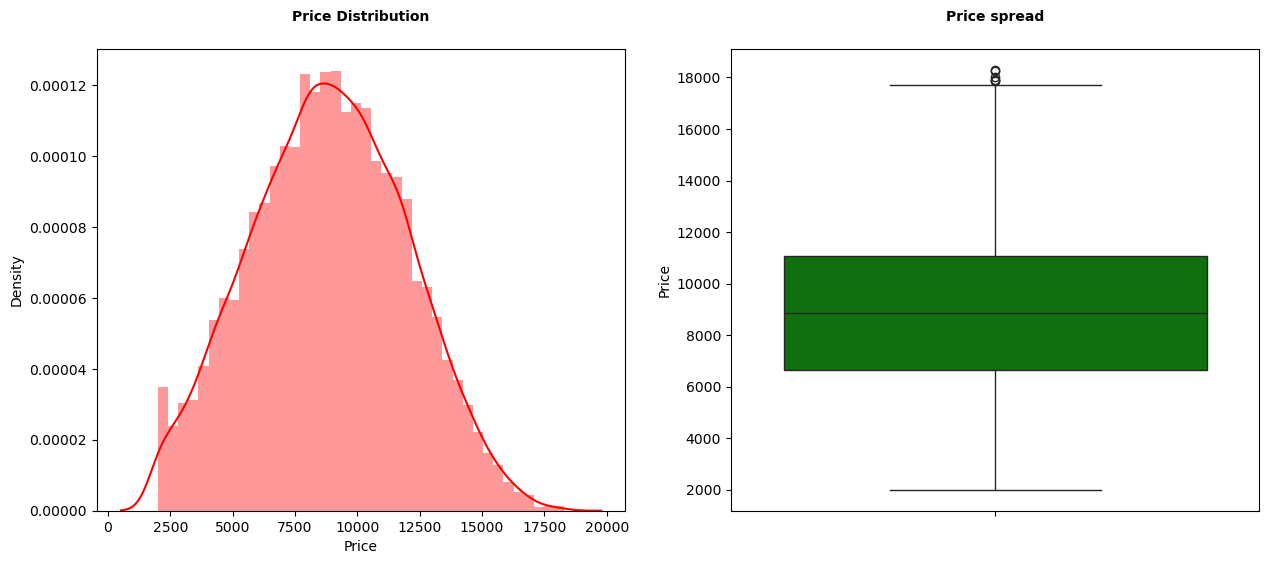

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_car["Price"],color="red")
plt.title('Price Distribution', fontweight="black",pad=20,fontsize=10)

plt.subplot(1,2,2)
sns.boxplot(data=df_car, y='Price', color='green')
plt.title('Price spread', fontweight="black",pad=20,fontsize=10)

##### 6.2 Chekling for Outliers in feature price

In [16]:
q1 = np.percentile(df_car['Price'], 25)
q3 = np.percentile(df_car['Price'], 75)

IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

print(f'Upper limit: {upper_limit}')
print(f'Lower limit: {lower_limit}')

# Get outliers
outliers_df = df_car[(df_car['Price'] < lower_limit) | (df_car['Price'] > upper_limit)]

# Get cleaned data without outliers
cleaned_df = df_car[(df_car['Price'] >= lower_limit) & (df_car['Price'] <= upper_limit)]

print(f'{len(outliers_df)} rows identified as outliers in the Price column.')

Upper limit: 17747.25
Lower limit: -14.75
6 rows identified as outliers in the Price column.


In [17]:
#outliers_df

##### 6.3 Create a list of categorical and numerical features

In [18]:
categorical_features = df_car.select_dtypes(include='object').columns.tolist()
numerical_features = df_car.select_dtypes(include=['int64', 'float64', 'int', 'float']).columns.tolist()

#categorical_features.remove('car_model')

##### 6.4 Visualizing the categorical features

In [19]:
sns.set_theme(style="darkgrid")

def plot_categorical_distribution(df, categorical_features):
    for col in categorical_features:
        plt.figure(figsize=(8, 4))

        # Sort categories by count in descending order
        sorted_counts = df[col].value_counts().sort_values(ascending=False)

        # Create countplot with dark colors
        sns.barplot(x=sorted_counts.index, y=sorted_counts.values, 
                    palette="magma")

        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.show()

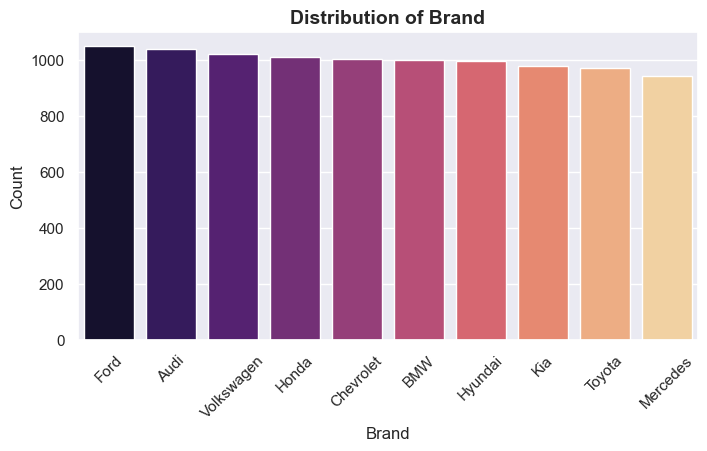

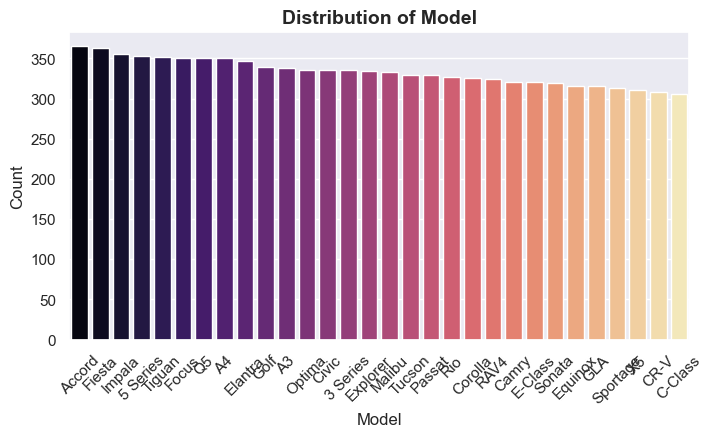

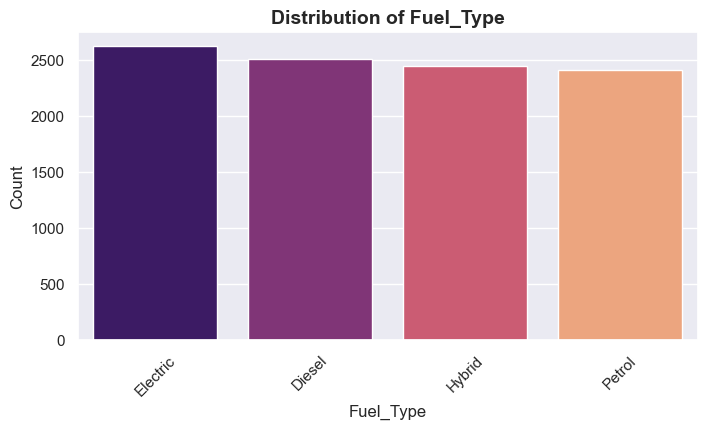

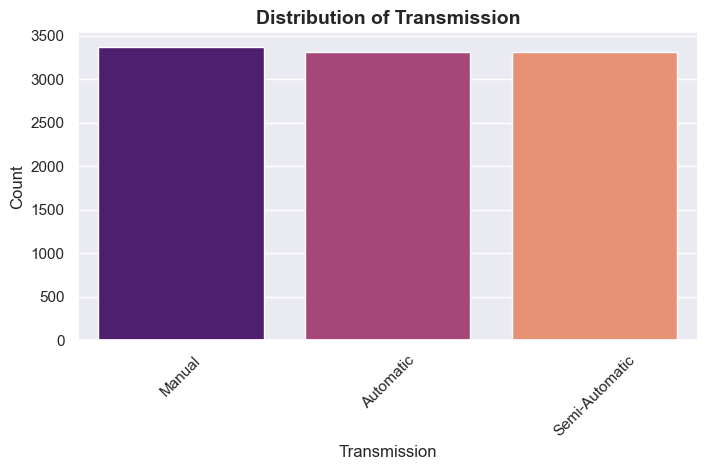

In [20]:
plot_categorical_distribution(df_car, categorical_features)

##### 6.5 Numerical Features Visualization

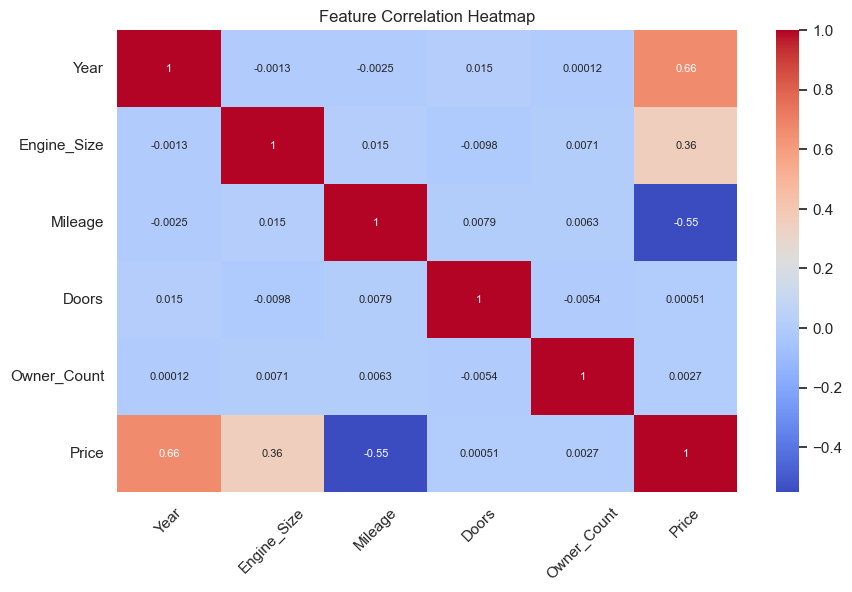

In [21]:
corr_matrix = df_car.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})

plt.yticks(rotation=0)  
plt.xticks(rotation=45)

plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
corr_matrix['Price'].sort_values(ascending=False).to_frame()

,Price
Price,1.000000
Year,0.663036
Engine_Size,0.357403
Owner_Count,0.002656
Doors,0.000511
Mileage,-0.551227


## 7. Feature Engineering

##### 7.1 Dropping Doors and Owner_Count features

In [23]:
features = ['Brand', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Price']

new_df = df_car[features]

In [24]:
new_df.columns

Index(['Brand', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage',
       'Price'],
      dtype='object')

##### 7.2 Split the dataframe into target variable and independent variables

In [25]:
y = new_df['Price']
X = new_df.drop(columns=['Price'])

##### 7.3 Creating Dummies Variables for all the Categorical Features

In [26]:
new_df.dtypes

Brand            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Price             int64
dtype: object

In [27]:
# Define preprocessing steps
numeric_features = ['Year', 'Engine_Size', 'Mileage']
categorical_features = ['Brand', 'Fuel_Type', 'Transmission']

In [28]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [29]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## 8. Split the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Print the shape of the splits
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train features shape: (8000, 6)
Test features shape: (2000, 6)
Train labels shape: (8000,)
Test labels shape: (2000,)


## 9 Building the models

##### 9.1 Set up pipelines for each model

In [32]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=10))
])

##### 9.4 Fit the models

In [33]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Brand', 'Fuel_Type',
                                                   'Transmission'])])),
                ('model', LinearRegression())])

In [34]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Brand', 'Fuel_Type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=10))])

#### 9.5 Evaluate models and Print Scores

In [35]:
pipelines = {"Linear Regression" : pipeline_lr,
             "Random Forest": pipeline_rf}

In [36]:
scores = {}
for name, model in pipelines.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    scores[name] = {"R² Score": r2, "MSE": mse, "RMSE": rmse}

In [37]:
for model, metrics in scores.items():
    print(f"{model}:")
    print(f"  - R² Score: {metrics['R² Score']:.4f}")
    print(f"  - Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}\n")

Linear Regression:
  - R² Score: 0.9995
  - Mean Squared Error (MSE): 4192.6176
  - Root Mean Squared Error (RMSE): 64.7504

Random Forest:
  - R² Score: 0.9738
  - Mean Squared Error (MSE): 241025.1454
  - Root Mean Squared Error (RMSE): 490.9431



## 10. Save the Model

In [38]:
cwd = os.getcwd()  # Get current directory
print("Current Working Directory:", cwd)

Current Working Directory: C:\Users\Erappa Monnanda\Machine_Learning_Loading\Car


In [39]:
import pickle

#Save the trained pipeline as a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline_lr, file)

print("✅ Model saved successfully as 'model.pkl'")

✅ Model saved successfully as 'model.pkl'
